In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [51]:
data= pd.read_csv("/content/Dataset.csv")

In [52]:
data.sample(6)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7884,C18098,1544.621765,1.000000,1534.12,26.50,1507.62,0.0,1.000000,0.083333,1.000000,0.0,0,42,2000.0,450.412929,958.889450,0.000000,12
65,C10068,1758.059987,1.000000,412.33,325.21,87.12,0.0,0.583333,0.333333,0.166667,0.0,0,11,1800.0,777.451648,897.905444,0.000000,12
2317,C12390,74.342040,1.000000,724.52,200.00,524.52,0.0,1.000000,0.083333,1.000000,0.0,0,13,4000.0,529.362717,189.362616,0.916667,12
5876,C16041,26.960540,0.636364,157.45,0.00,157.45,0.0,0.416667,0.000000,0.416667,0.0,0,5,1000.0,238.253379,116.450584,0.000000,12
2221,C12291,391.385478,1.000000,0.00,0.00,0.00,0.0,0.333333,0.000000,0.333333,0.0,0,0,4000.0,192.787345,227.924469,0.000000,12
1488,C11539,937.434519,1.000000,1124.88,1085.63,39.25,0.0,0.416667,0.333333,0.083333,0.0,0,9,2500.0,993.196174,252.572491,0.000000,12


In [53]:
data.shape

(8950, 18)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [55]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [56]:
#handling missing value
imputer = SimpleImputer(strategy='mean')

In [57]:
data['MINIMUM_PAYMENTS'] = imputer.fit_transform(data[['MINIMUM_PAYMENTS']])
data['CREDIT_LIMIT'] = imputer.fit_transform(data[['CREDIT_LIMIT']])

In [58]:
data.duplicated().sum() #there is no duplicate values present in dataset

0

In [59]:
data['TENURE'].value_counts()

,count
TENURE,
12,7584
11,365
10,236
6,204
8,196
7,190
9,175


In [60]:
data.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [61]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<ipython-input-62-149a6c9f1190>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CREDIT_LIMIT'])


<Axes: xlabel='CREDIT_LIMIT', ylabel='Density'>

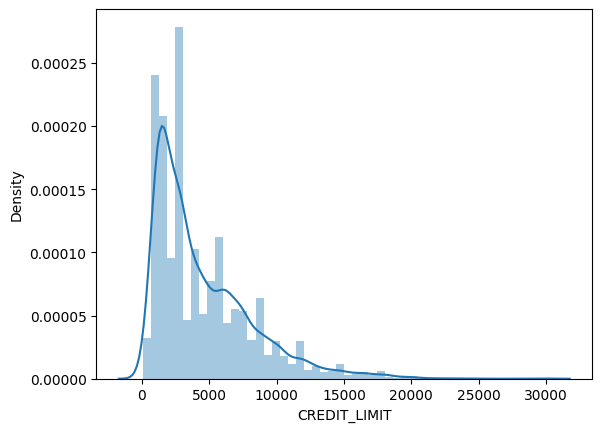

In [62]:
sns.distplot(data['CREDIT_LIMIT'])

<Axes: ylabel='CREDIT_LIMIT'>

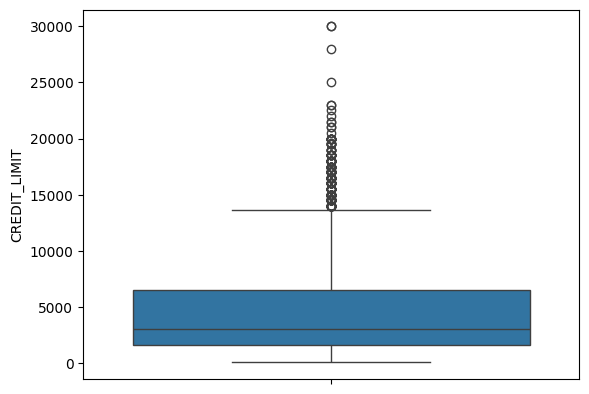

In [63]:
sns.boxplot(data['CREDIT_LIMIT'])

In [64]:
#with the help of distplot we can understand the distribution of column

<Axes: ylabel='BALANCE'>

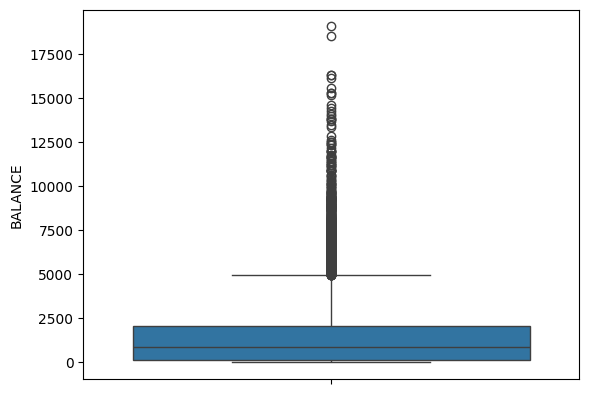

In [65]:
sns.boxplot(data['BALANCE'])

<Axes: ylabel='BALANCE_FREQUENCY'>

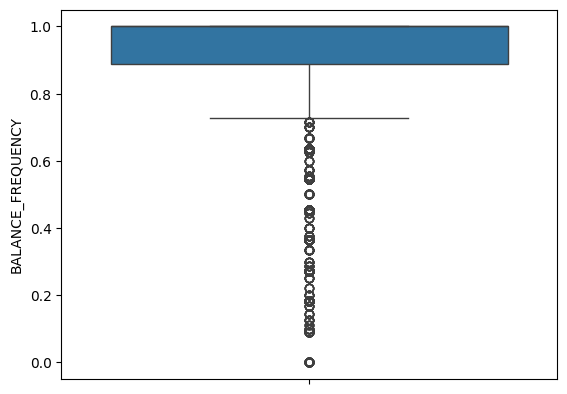

In [66]:
sns.boxplot(data['BALANCE_FREQUENCY'])

<Axes: ylabel='PURCHASES'>

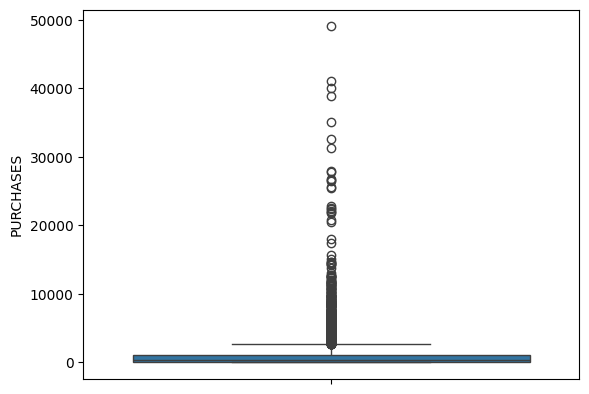

In [67]:
sns.boxplot(data['PURCHASES'])

<Axes: ylabel='ONEOFF_PURCHASES'>

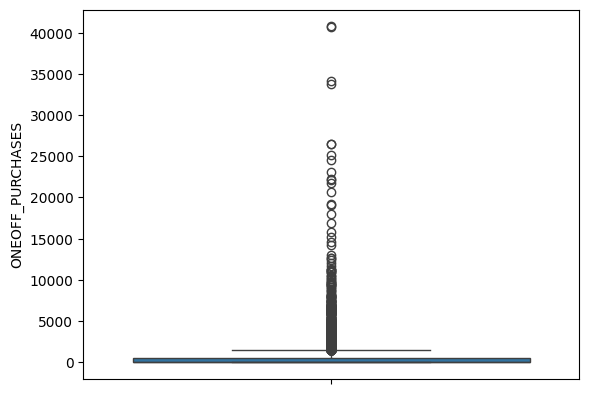

In [68]:
sns.boxplot(data['ONEOFF_PURCHASES'])

<Axes: ylabel='INSTALLMENTS_PURCHASES'>

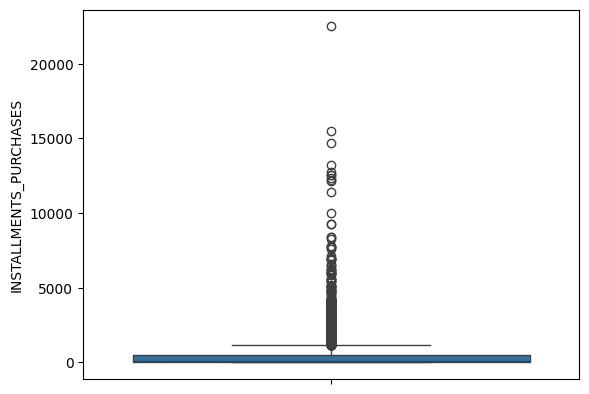

In [69]:
sns.boxplot(data['INSTALLMENTS_PURCHASES'])

In [70]:
Q1 = data['CREDIT_LIMIT'].quantile(0.25)


In [71]:
Q3 =data['CREDIT_LIMIT'].quantile(0.75)


In [72]:
IQR = Q3-Q1

In [73]:
UpperL = Q3 + 1.5* IQR
lowerL =Q1 - 1.5*IQR

In [74]:
UpperL

13850.0

In [75]:
data[data['CREDIT_LIMIT'] > UpperL]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
85,C10089,134.917202,1.000000,1247.80,1247.80,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,22,16500.0,1275.229436,171.357189,1.00,12
120,C10125,8504.876253,1.000000,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.000000,0.500000,10,85,17000.0,1888.756861,2167.446204,0.00,12
124,C10130,14224.115410,1.000000,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.00,12
128,C10134,11167.234030,1.000000,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.00,12
136,C10142,2494.868559,1.000000,5491.79,1390.50,4101.29,0.000000,1.000000,0.500000,1.000000,0.000000,0,52,17000.0,1015.311953,615.924020,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6629,C16812,16259.448570,1.000000,5024.68,3582.45,1442.23,328.698275,1.000000,0.833333,1.000000,0.083333,2,143,18000.0,4987.235359,5137.504664,0.00,12
7046,C17237,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.014960,11853.796130,0.75,12
7764,C17975,10856.483010,1.000000,45.65,45.65,0.00,5096.886673,0.083333,0.083333,0.000000,0.250000,5,1,14500.0,2670.733732,2917.469357,0.00,12
7962,C18177,13318.659120,1.000000,3504.74,3266.29,238.45,1306.849608,0.636364,0.545455,0.272727,0.181818,3,16,17500.0,2594.820938,4762.246065,0.00,11


In [76]:
data[(data['CREDIT_LIMIT'] > UpperL) | (data['CREDIT_LIMIT'] < lowerL)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
85,C10089,134.917202,1.000000,1247.80,1247.80,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,22,16500.0,1275.229436,171.357189,1.00,12
120,C10125,8504.876253,1.000000,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.000000,0.500000,10,85,17000.0,1888.756861,2167.446204,0.00,12
124,C10130,14224.115410,1.000000,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.00,12
128,C10134,11167.234030,1.000000,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.00,12
136,C10142,2494.868559,1.000000,5491.79,1390.50,4101.29,0.000000,1.000000,0.500000,1.000000,0.000000,0,52,17000.0,1015.311953,615.924020,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6629,C16812,16259.448570,1.000000,5024.68,3582.45,1442.23,328.698275,1.000000,0.833333,1.000000,0.083333,2,143,18000.0,4987.235359,5137.504664,0.00,12
7046,C17237,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.014960,11853.796130,0.75,12
7764,C17975,10856.483010,1.000000,45.65,45.65,0.00,5096.886673,0.083333,0.083333,0.000000,0.250000,5,1,14500.0,2670.733732,2917.469357,0.00,12
7962,C18177,13318.659120,1.000000,3504.74,3266.29,238.45,1306.849608,0.636364,0.545455,0.272727,0.181818,3,16,17500.0,2594.820938,4762.246065,0.00,11


In [77]:
data1 =data[(data['CREDIT_LIMIT'] < UpperL ) & (data['CREDIT_LIMIT'] >lowerL)]

<Axes: ylabel='CREDIT_LIMIT'>

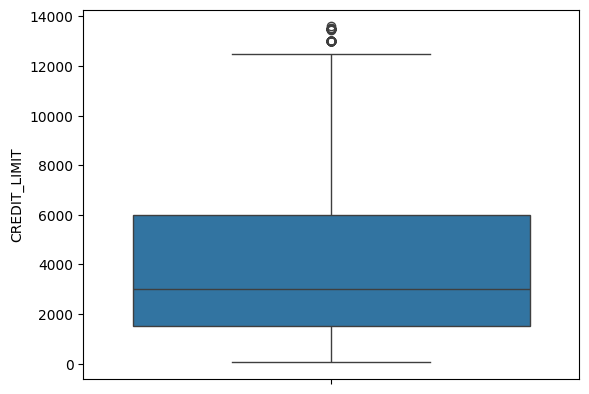

In [78]:
sns.boxplot(data1['CREDIT_LIMIT'])

In [79]:
#capping method to sqish all the outliers within datapoint

In [80]:
data2=data.copy()

In [81]:
data2['CREDIT_LIMIT']=data2['CREDIT_LIMIT']=np.where(data2['CREDIT_LIMIT'] >UpperL ,
                   UpperL,
                    np.where(data2['CREDIT_LIMIT'] < lowerL,
                            lowerL,
                            data2['CREDIT_LIMIT'])
                   )

<Axes: ylabel='CREDIT_LIMIT'>

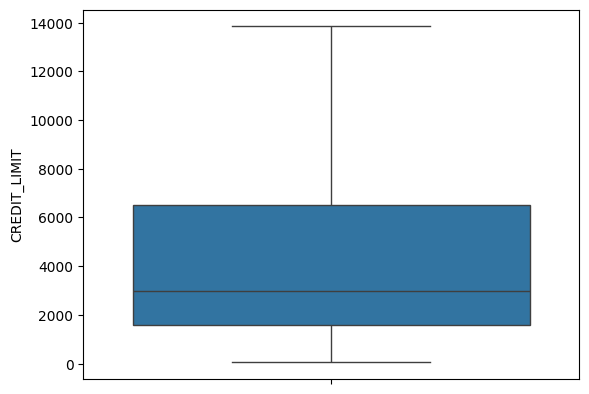

In [83]:
sns.boxplot(data2['CREDIT_LIMIT'])

<ipython-input-84-c5ef64e8df48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CREDIT_LIMIT'])
<ipython-input-84-c5ef64e8df48>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['CREDIT_LIMIT'])


Text(0.5, 1.0, 'after  handling outlier')

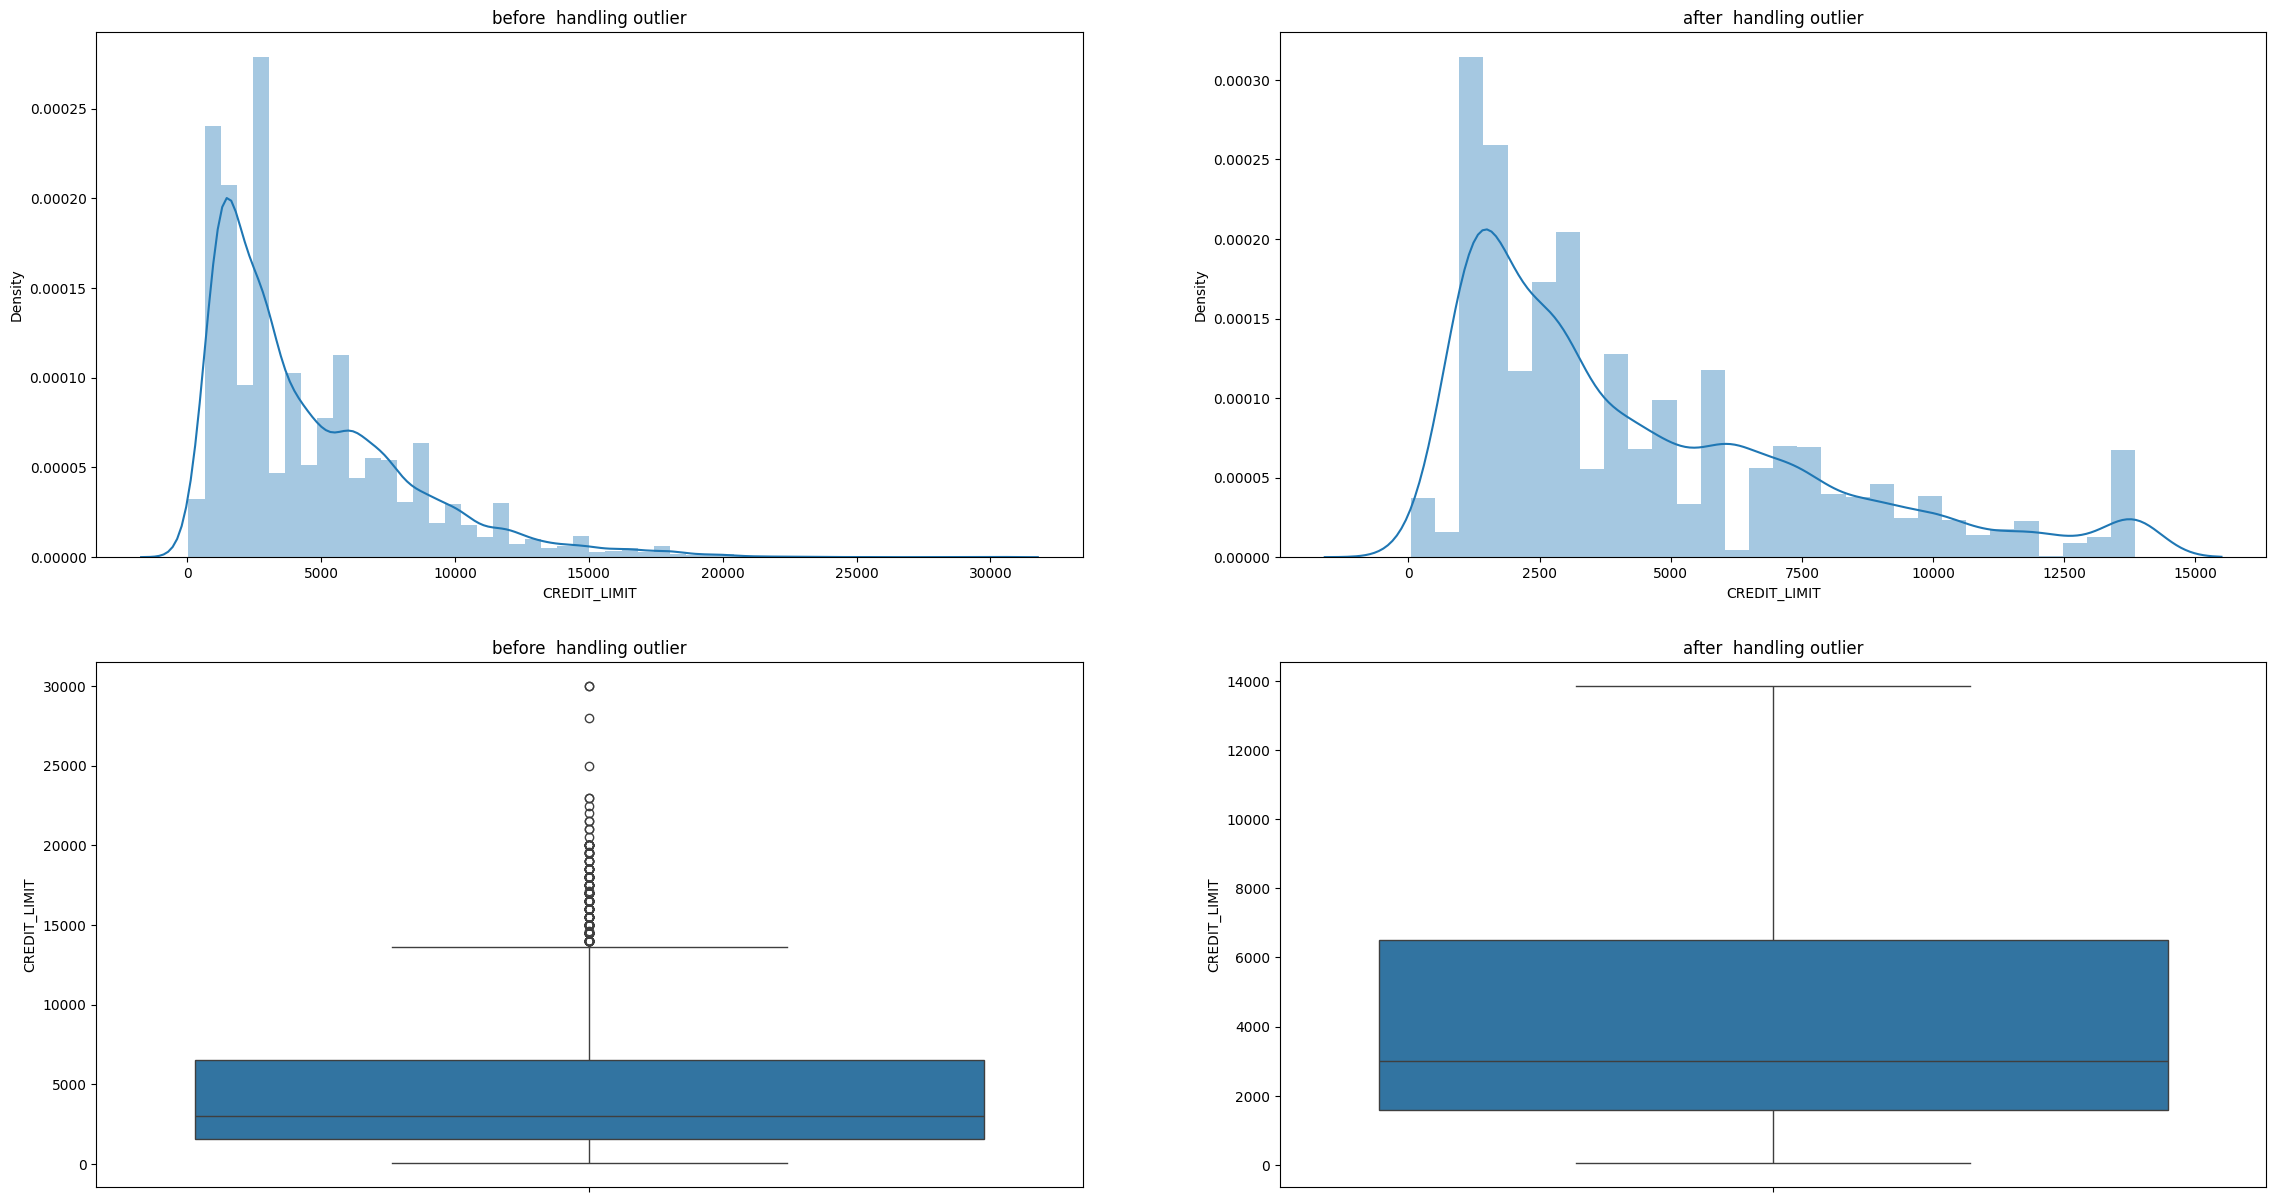

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(28,15))
plt.subplot(2,2,1)
plt.title("before  handling outlier")
sns.distplot(data['CREDIT_LIMIT'])

plt.subplot(2,2,2)
plt.title("after  handling outlier")
sns.distplot(data2['CREDIT_LIMIT'])

plt.subplot(2,2,3)
sns.boxplot(data['CREDIT_LIMIT'])
plt.title("before  handling outlier")

plt.subplot(2,2,4)
sns.boxplot(data2['CREDIT_LIMIT'])
plt.title("after  handling outlier")

In [85]:
# Feature scaling (standardize the features)
scaler = StandardScaler()


In [87]:
scaled_data = scaler.fit_transform(data.drop(columns=['CUST_ID']))


In [88]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns.drop('CUST_ID'))

In [90]:
## EDA

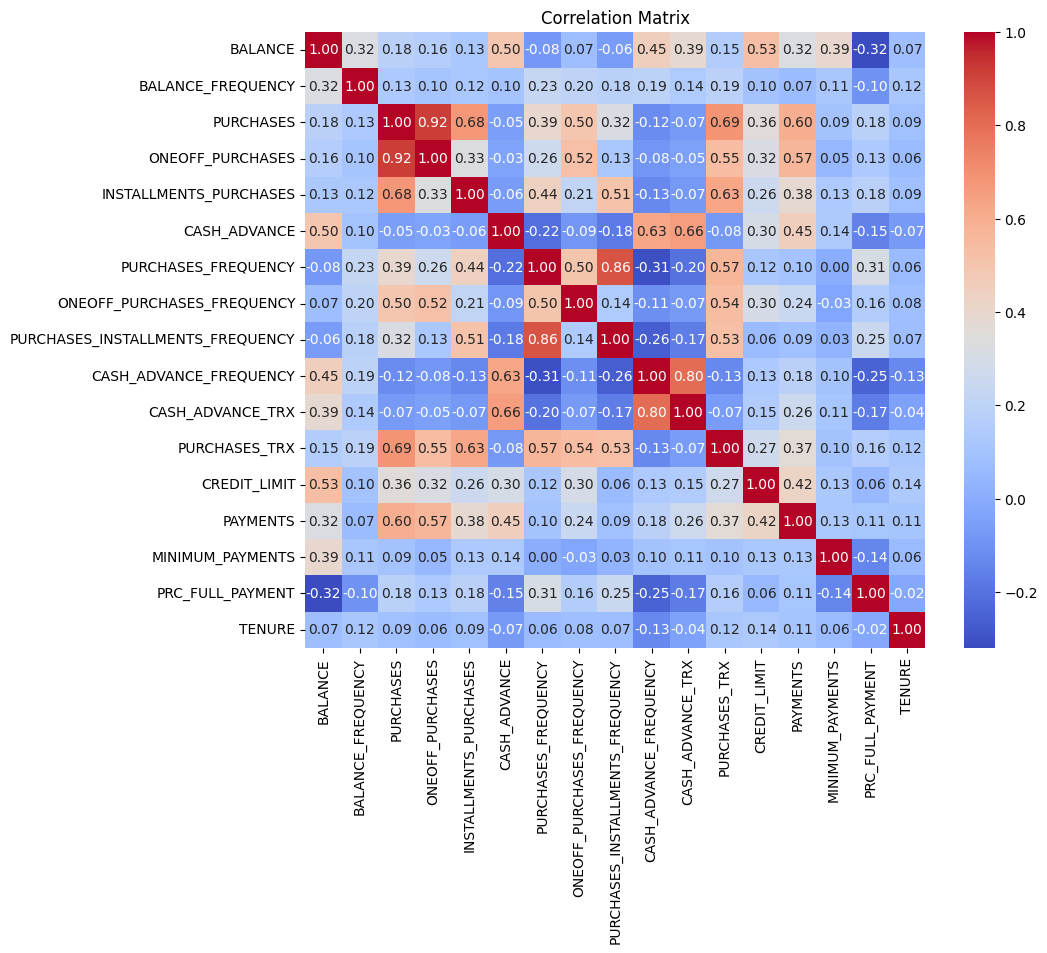

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(scaled_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

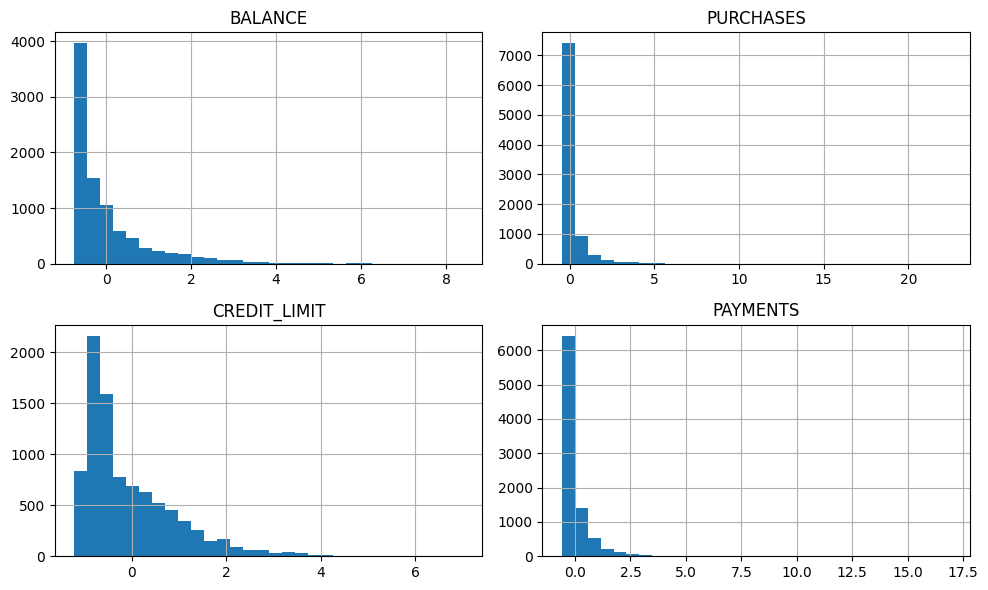

In [92]:
features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
scaled_data[features].hist(figsize=(10, 6), bins=30)
plt.tight_layout()
plt.show()

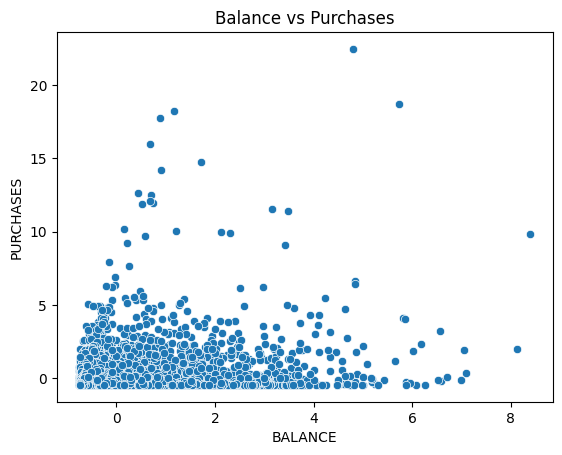

In [93]:
sns.scatterplot(x=scaled_data['BALANCE'], y=scaled_data['PURCHASES'])
plt.title("Balance vs Purchases")
plt.show()

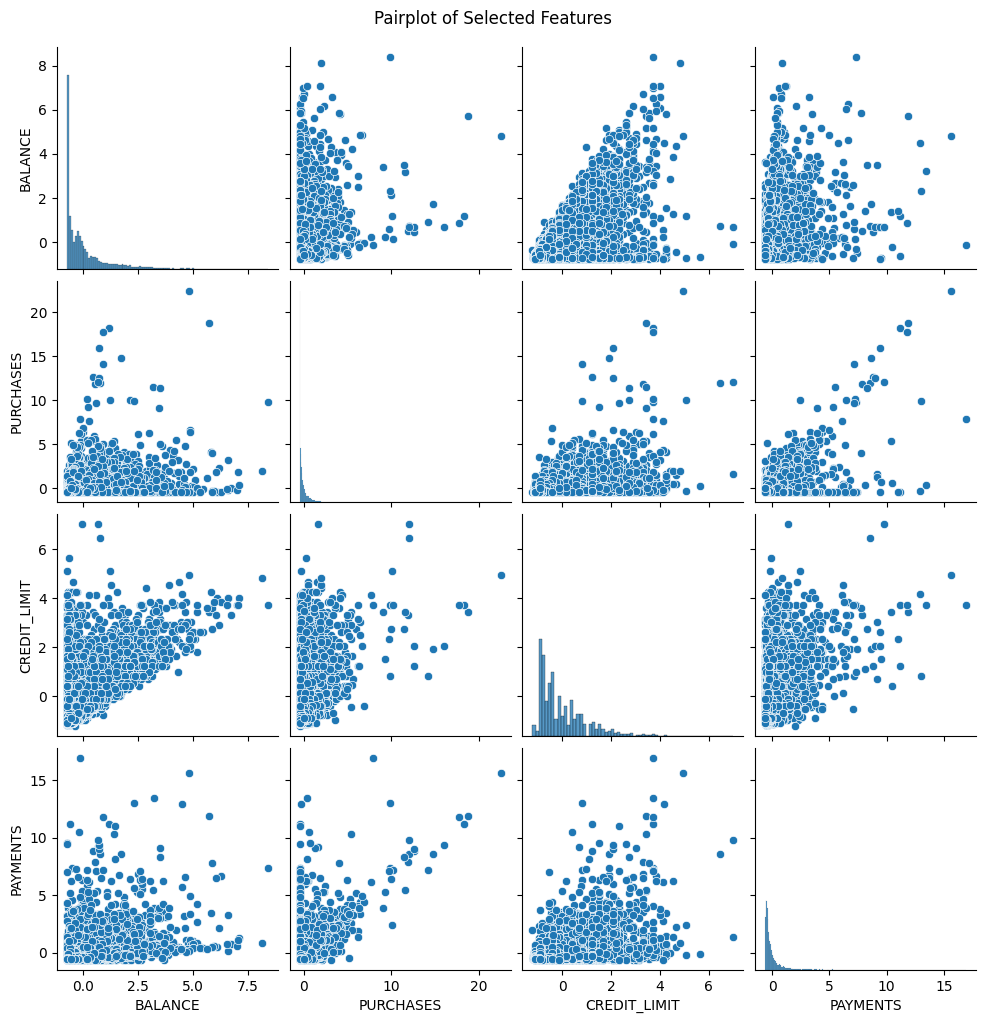

In [94]:
sns.pairplot(scaled_data[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

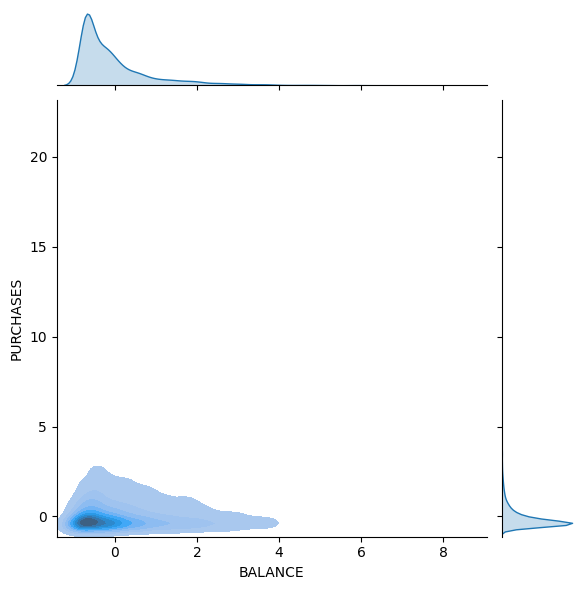

In [95]:
sns.jointplot(x=scaled_data['BALANCE'], y=scaled_data['PURCHASES'], kind="kde", fill=True)
plt.title("KDE Plot: Balance vs Purchases", y=1.02)
plt.show()

In [141]:
from sklearn.cluster import KMeans,DBSCAN

In [142]:
kmeans_original = KMeans(n_clusters=3, random_state=42)


In [143]:
kmeans_clusters_original = kmeans_original.fit_predict(scaled_data)

In [144]:
kmeans_clusters_original

array([1, 0, 2, ..., 1, 1, 1], dtype=int32)

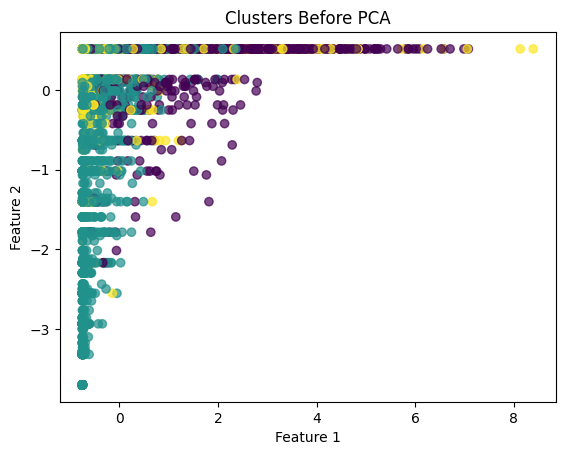

In [145]:
# Plot clusters before PCA using DataFrame iloc to access columns
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], c=kmeans_clusters_original, cmap='viridis', alpha=0.7)
plt.title("Clusters Before PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [146]:
from sklearn.decomposition import PCA

In [147]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [148]:
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])


In [149]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(pca_df)

In [150]:
kmeans_clusters

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

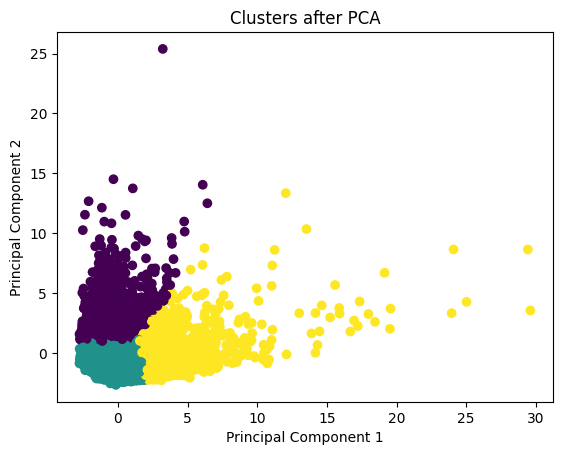

In [151]:

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title("Clusters after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [152]:
# Evaluation metrics for K-Means
kmeans_silhouette = silhouette_score(pca_df, kmeans_clusters)
kmeans_calinski_harabasz = calinski_harabasz_score(pca_df, kmeans_clusters)
kmeans_davies_bouldin = davies_bouldin_score(pca_df, kmeans_clusters)

In [153]:
dbscan = DBSCAN(eps=0.5, min_samples=5)


In [154]:

dbscan_clusters = dbscan.fit_predict(pca_df)

In [155]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [156]:
# Evaluation metrics for DBSCAN
dbscan_silhouette = silhouette_score(pca_df, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else "N/A"
dbscan_calinski_harabasz = calinski_harabasz_score(pca_df, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else "N/A"
dbscan_davies_bouldin = davies_bouldin_score(pca_df, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else "N/A"

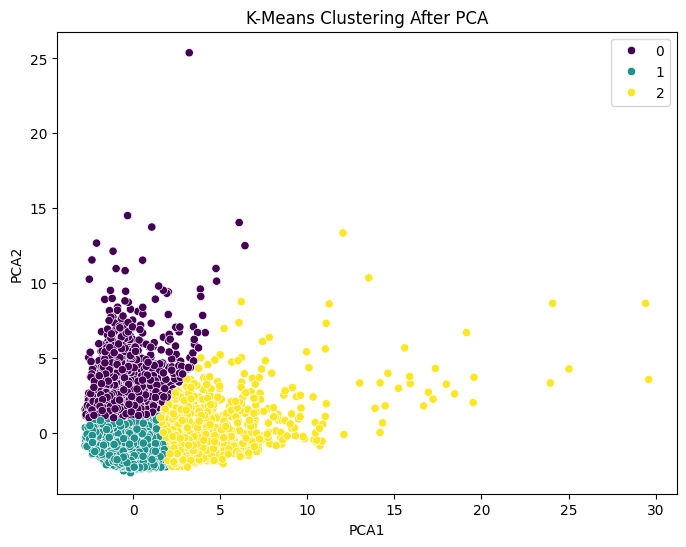

In [158]:
# Plot K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=kmeans_clusters, palette='viridis')
plt.title('K-Means Clustering After PCA')
plt.show()

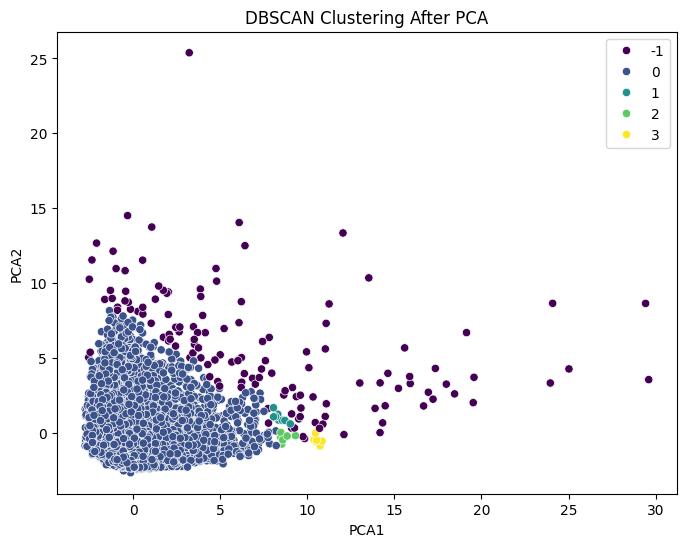

In [157]:
# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=dbscan_clusters, palette='viridis')
plt.title('DBSCAN Clustering After PCA')
plt.show()

In [163]:
# Display clustering evaluation metrics in a line-by-line format
evaluation_metrics = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'K-Means': [kmeans_silhouette, kmeans_calinski_harabasz, kmeans_davies_bouldin],
    'DBSCAN': [dbscan_silhouette, dbscan_calinski_harabasz, dbscan_davies_bouldin]
}
# Convert to a DataFrame for proper display
metrics_df = pd.DataFrame(evaluation_metrics)

# Print the metrics DataFrame
print(metrics_df)

                    Metric      K-Means      DBSCAN
0         Silhouette Score     0.449056    0.626753
1  Calinski-Harabasz Score  5337.073412  519.550279
2     Davies-Bouldin Score     0.817046    1.167705


In [164]:
# Elbow Method to find the optimal number of clusters
wcss = []
silhouette_scores = []

In [165]:
for k in range(2, 11):  # Checking cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # WCSS (Within-Cluster Sum of Squares)

    # Silhouette Score
    kmeans_clusters = kmeans.predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, kmeans_clusters)
    silhouette_scores.append(silhouette_avg)

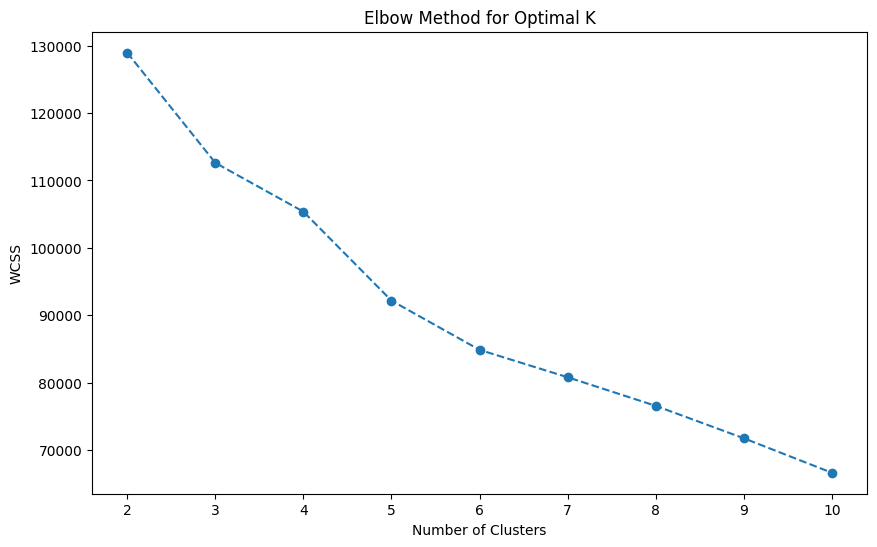

In [167]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


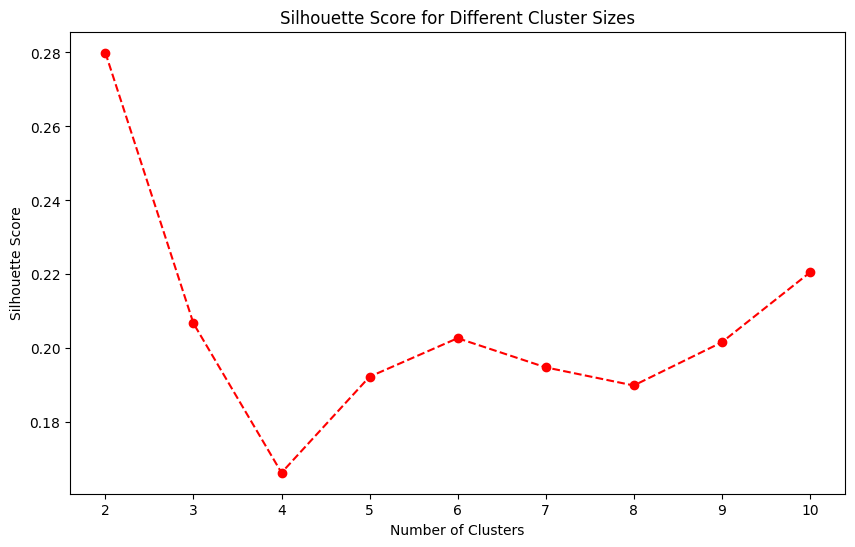

In [168]:

# Plot the Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='red')
plt.title('Silhouette Score for Different Cluster Sizes')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [174]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

In [175]:
# Add cluster labels to the original dataset
data['Cluster'] = kmeans_clusters


In [176]:
numeric_columns = data.select_dtypes(include=[float, int]).columns

In [178]:
cluster_profile = data.groupby('Cluster')[numeric_columns].mean()

In [179]:
print(cluster_profile)

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        4545.974404           0.968555   578.629243        363.840483   
1         943.444730           0.789577   302.146789        207.553551   
2        1288.676491           0.968227  2185.116559       1239.540251   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    214.870685   4513.943197             0.286012   
1                     94.891652    530.425643             0.244520   
2                    945.965035    235.200775             0.926645   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.136806                          0.187025   
1                          0.091332                        